In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, \
                            precision_recall_curve, \
                            precision_score, recall_score, \
                            confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Model training

## Embeding size 100

In [2]:
from sklearn.linear_model import LogisticRegression

------------------------------------TRAINING INFO-------------------------------------------------
best_params for model is {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
best_R2_score on train for model is 0.9722712543287484
Best Threshold is 0.1676457933334584 with F-Score=0.5882352941176471 on validation
------------------------------------TESTING INFO-------------------------------------------------
Roc_Auc on test - 0.9722891883230252
F1 on test - 0.6052631578947367
precision on test - 0.575
recall on test - 0.6388888888888888


/var/folders/yr/w0yz1pk90qz0dsljws61ktj80000gn/T/ipykernel_78249/1633014148.py:31: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


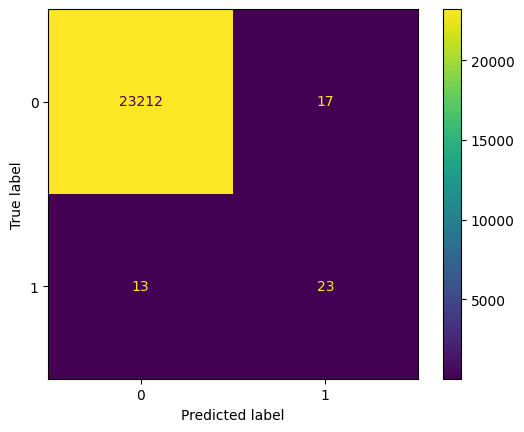

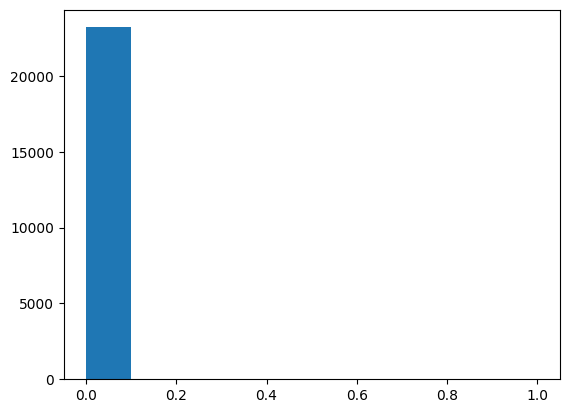

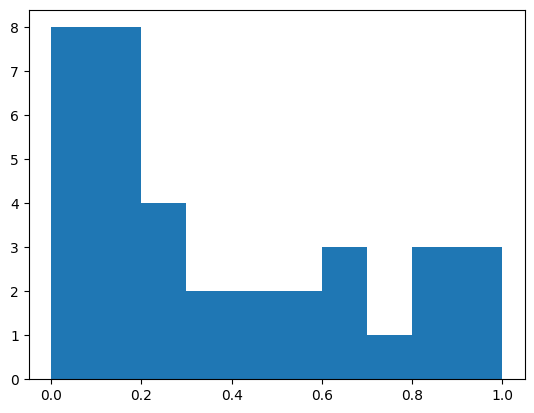

In [4]:
train = pd.read_csv('data_vectorized/train_100.csv', index_col=0)
val = pd.read_csv('data_vectorized/val_100.csv', index_col=0)
test = pd.read_csv('data_vectorized/test_100.csv', index_col=0)

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100, 200],
    'solver': ['liblinear'],
    'max_iter': [1000],
}
skf = StratifiedKFold(n_splits=3)
model = GridSearchCV(LogisticRegression(random_state=42),
                     params,
                     cv=skf,
                     scoring='roc_auc',
                     return_train_score=True,
                     verbose=0,
                     n_jobs=-1,
                     error_score='raise')
model.fit(train.drop(columns=['malicious']), train.malicious)

print('------------------------------------TRAINING INFO-------------------------------------------------')
print(f'best_params for model is {model.best_params_}')
print(f'best_R2_score on train for model is {model.best_score_}')


y_pred = model.predict_proba(val.drop(columns=['malicious']))[:,-1]
y_val = val.malicious

precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
fscore = (2 * precision * recall) / (precision + recall)
fscore[np.isnan(fscore)] = -1  # for infinity

ix = np.argmax(fscore)
print(f'Best Threshold is {thresholds[ix]} with F-Score={fscore[ix]} on validation')
tr = thresholds[ix]

y_pred = model.predict_proba(test.drop(columns=['malicious']))[:,-1]
y_pred_c = (y_pred > tr)
y_test = test.malicious
print('------------------------------------TESTING INFO-------------------------------------------------')
print(f'Roc_Auc on test - {roc_auc_score(y_test, y_pred)}')
print(f'F1 on test - {f1_score(y_test, y_pred_c)}')
print(f'precision on test - {precision_score(y_test, y_pred_c)}')
print(f'recall on test - {recall_score(y_test, y_pred_c)}')

cm = confusion_matrix(y_test, y_pred_c, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
disp.plot()
plt.show()

plt.hist(y_pred[y_test==0])
plt.show()
plt.hist(y_pred[y_test==1])
plt.show()

## Embeding size 256

------------------------------------TRAINING INFO-------------------------------------------------
best_params for model is {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
best_R2_score on train for model is 0.9788950546028833
Best Threshold is 0.20924553690327377 with F-Score=0.606060606060606 on validation
------------------------------------TESTING INFO-------------------------------------------------
Roc_Auc on test - 0.9551004252347401
F1 on test - 0.5945945945945946
precision on test - 0.5789473684210527
recall on test - 0.6111111111111112


/var/folders/yr/w0yz1pk90qz0dsljws61ktj80000gn/T/ipykernel_78249/2816101762.py:31: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


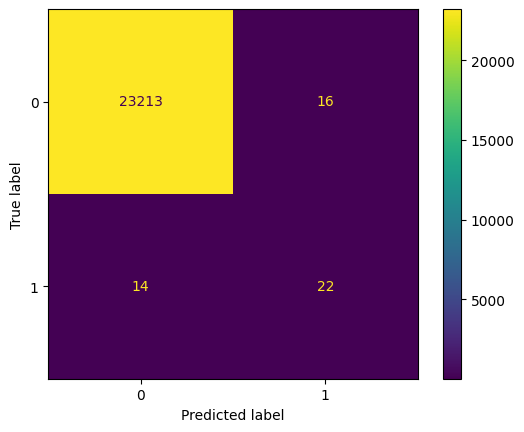

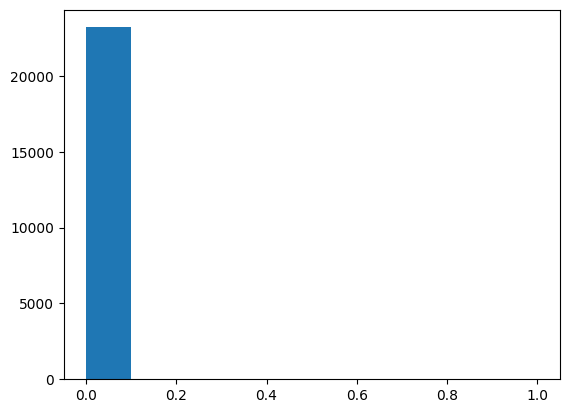

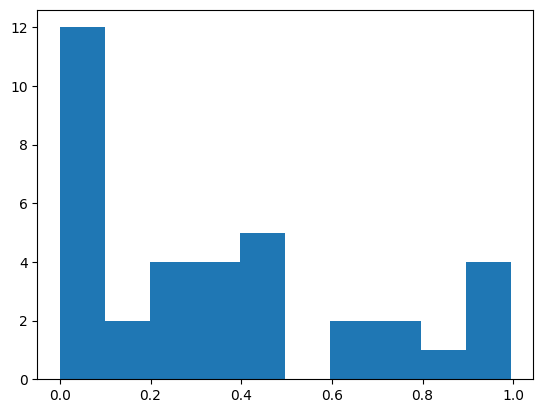

In [5]:
train = pd.read_csv('data_vectorized/train_256.csv', index_col=0)
val = pd.read_csv('data_vectorized/val_256.csv', index_col=0)
test = pd.read_csv('data_vectorized/test_256.csv', index_col=0)

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100, 200],
    'solver': ['liblinear'],
    'max_iter': [1000],
}
skf = StratifiedKFold(n_splits=3)
model = GridSearchCV(LogisticRegression(random_state=42),
                     params,
                     cv=skf,
                     scoring='roc_auc',
                     return_train_score=True,
                     verbose=0,
                     n_jobs=-1,
                     error_score='raise')
model.fit(train.drop(columns=['malicious']), train.malicious)

print('------------------------------------TRAINING INFO-------------------------------------------------')
print(f'best_params for model is {model.best_params_}')
print(f'best_R2_score on train for model is {model.best_score_}')


y_pred = model.predict_proba(val.drop(columns=['malicious']))[:,-1]
y_val = val.malicious

precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
fscore = (2 * precision * recall) / (precision + recall)
fscore[np.isnan(fscore)] = -1  # for infinity

ix = np.argmax(fscore)
print(f'Best Threshold is {thresholds[ix]} with F-Score={fscore[ix]} on validation')
tr = thresholds[ix]

y_pred = model.predict_proba(test.drop(columns=['malicious']))[:,-1]
y_pred_c = (y_pred > tr)
y_test = test.malicious
print('------------------------------------TESTING INFO-------------------------------------------------')
print(f'Roc_Auc on test - {roc_auc_score(y_test, y_pred)}')
print(f'F1 on test - {f1_score(y_test, y_pred_c)}')
print(f'precision on test - {precision_score(y_test, y_pred_c)}')
print(f'recall on test - {recall_score(y_test, y_pred_c)}')

cm = confusion_matrix(y_test, y_pred_c, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
disp.plot()
plt.show()

plt.hist(y_pred[y_test==0])
plt.show()
plt.hist(y_pred[y_test==1])
plt.show()

## Embeding size 512

------------------------------------TRAINING INFO-------------------------------------------------
best_params for model is {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
best_R2_score on train for model is 0.9777764179210572
Best Threshold is 0.2315207396380952 with F-Score=0.5333333333333333 on validation
------------------------------------TESTING INFO-------------------------------------------------
Roc_Auc on test - 0.9657037898029762
F1 on test - 0.619718309859155
precision on test - 0.6285714285714286
recall on test - 0.6111111111111112


/var/folders/yr/w0yz1pk90qz0dsljws61ktj80000gn/T/ipykernel_78249/2403928497.py:31: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)


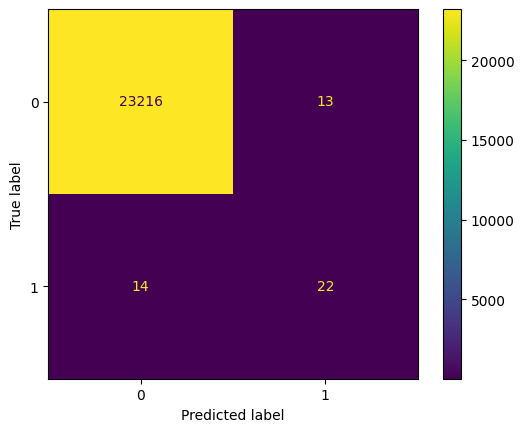

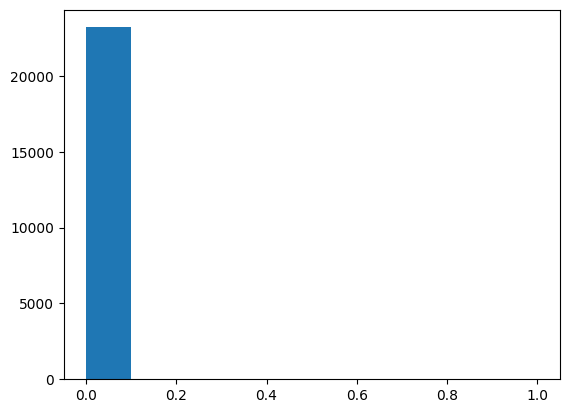

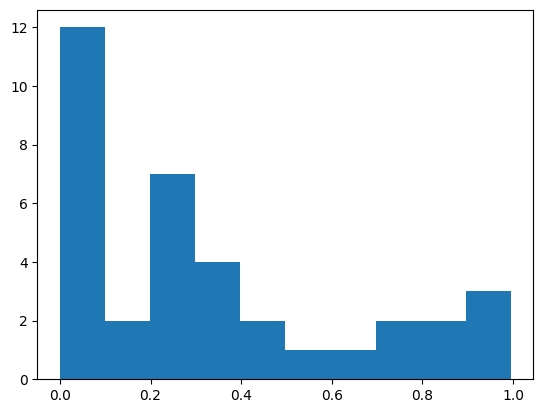

In [6]:
train = pd.read_csv('data_vectorized/train_512.csv', index_col=0)
val = pd.read_csv('data_vectorized/val_512.csv', index_col=0)
test = pd.read_csv('data_vectorized/test_512.csv', index_col=0)

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100, 200],
    'solver': ['liblinear'],
    'max_iter': [1000],
}
skf = StratifiedKFold(n_splits=3)
model = GridSearchCV(LogisticRegression(random_state=42),
                     params,
                     cv=skf,
                     scoring='roc_auc',
                     return_train_score=True,
                     verbose=0,
                     n_jobs=-1,
                     error_score='raise')
model.fit(train.drop(columns=['malicious']), train.malicious)

print('------------------------------------TRAINING INFO-------------------------------------------------')
print(f'best_params for model is {model.best_params_}')
print(f'best_R2_score on train for model is {model.best_score_}')


y_pred = model.predict_proba(val.drop(columns=['malicious']))[:,-1]
y_val = val.malicious

precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
fscore = (2 * precision * recall) / (precision + recall)
fscore[np.isnan(fscore)] = -1  # for infinity

ix = np.argmax(fscore)
print(f'Best Threshold is {thresholds[ix]} with F-Score={fscore[ix]} on validation')
tr = thresholds[ix]

y_pred = model.predict_proba(test.drop(columns=['malicious']))[:,-1]
y_pred_c = (y_pred > tr)
y_test = test.malicious
print('------------------------------------TESTING INFO-------------------------------------------------')
print(f'Roc_Auc on test - {roc_auc_score(y_test, y_pred)}')
print(f'F1 on test - {f1_score(y_test, y_pred_c)}')
print(f'precision on test - {precision_score(y_test, y_pred_c)}')
print(f'recall on test - {recall_score(y_test, y_pred_c)}')

cm = confusion_matrix(y_test, y_pred_c, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
disp.plot()
plt.show()

plt.hist(y_pred[y_test==0])
plt.show()
plt.hist(y_pred[y_test==1])
plt.show()